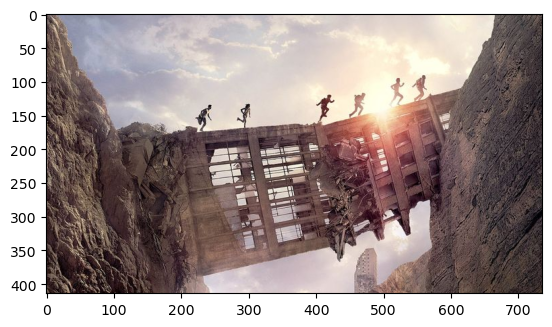

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/tmr.jpg")

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_img)

plt.show()

In [5]:
print(img.shape)

(414, 736, 3)


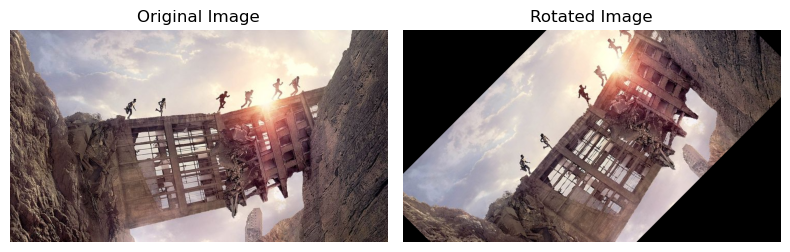

In [39]:

# Get image dimensions
h, w = RGB_img.shape[:2]

# Define the rotation angle and convert it to radians
angle = 45
theta = np.radians(angle)

# Define the center of rotation (center of the image)
center = (w // 2, h // 2)

# Create an empty image (rotated image will be stored here)
rotated_img = np.zeros_like(RGB_img)

# Manually compute the rotation matrix
# [ cos(θ)  -sin(θ)  tx ]
# [ sin(θ)   cos(θ)  ty ]
# Where tx and ty are the translation to center the image
# The matrix rotates around the center of the image
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

# Loop through each pixel in the rotated image
for i in range(h):
    for j in range(w):
        # Translate the pixel coordinates so the rotation happens around the center
        x = j - center[0]
        y = i - center[1]

        # Apply the rotation matrix to the coordinates
        new_x = int(cos_theta * x - sin_theta * y + center[0])
        new_y = int(sin_theta * x + cos_theta * y + center[1])

        # Check if the new pixel is within the bounds of the original image
        if 0 <= new_x < w and 0 <= new_y < h:
            rotated_img[i, j] = RGB_img[new_y, new_x]

# Visualize the original and rotated images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Rotated image visualization
plt.subplot(1, 2, 2)
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


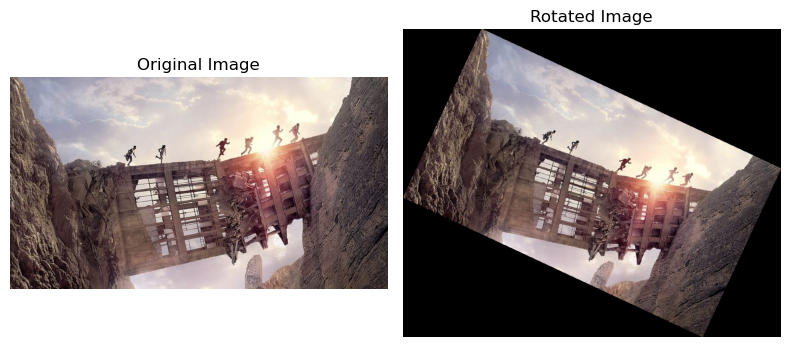

In [41]:

# Get image dimensions
h, w = RGB_img.shape[:2]

# Define the angle of rotation (in degrees)
angle = 25
theta = np.radians(angle)

# Calculate the center of the image
center = (w // 2, h // 2)

# Calculate the sine and cosine of the rotation angle
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

# Compute the new width and height of the rotated image
abs_cos = abs(cos_theta)
abs_sin = abs(sin_theta)

# New dimensions of the rotated image
new_w = int(h * abs_sin + w * abs_cos)
new_h = int(h * abs_cos + w * abs_sin)

# Create an empty image with the new dimensions
rotated_img = np.zeros((new_h, new_w, 3), dtype=RGB_img.dtype)

# Calculate the translation to center the rotated image in the new canvas
# Translate the center of the image to the middle of the new rotated image
new_center = (new_w // 2, new_h // 2)

# Loop through each pixel in the rotated image
for i in range(new_h):
    for j in range(new_w):
        # Translate pixel coordinates to the original image's coordinate system
        x = j - new_center[0]
        y = i - new_center[1]

        # Reverse the translation and apply the rotation matrix
        original_x = int(cos_theta * x + sin_theta * y + center[0])
        original_y = int(-sin_theta * x + cos_theta * y + center[1])

        # If the pixel is within bounds of the original image, copy the pixel value
        if 0 <= original_x < w and 0 <= original_y < h:
            rotated_img[i, j] = RGB_img[original_y, original_x]

# Visualize the original and rotated images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Rotated image visualization
plt.subplot(1, 2, 2)
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


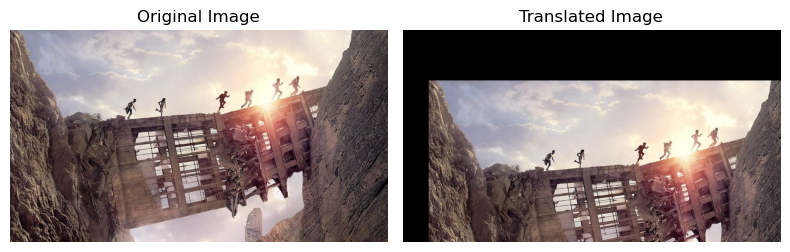

In [7]:
h, w = RGB_img.shape[:2]

# Define the translation amount (tx, ty)
tx, ty = 50, 100  # 50 pixels to the right, 100 pixels down

# Create an empty image for the translated result (initialized to zeros)
translated_img = np.zeros_like(RGB_img)

# Loop through each pixel in the original image
for y in range(h):
    for x in range(w):
        # Calculate the new position after translation
        new_x = x + tx
        new_y = y + ty
        
        # Check if the new position is within the bounds of the translated image
        if 0 <= new_x < w and 0 <= new_y < h:
            translated_img[new_y, new_x] = RGB_img[y, x]

# Visualize the original and translated images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Translated image visualization
plt.subplot(1, 2, 2)
plt.imshow(translated_img)
plt.title("Translated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


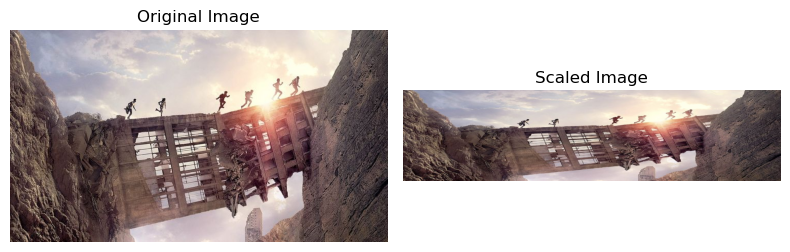

In [29]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Define the scaling factors (sx, sy)
sx, sy = 3.5, 1.5  # Scale by 1.5 times in both X and Y directions

# Calculate the new dimensions of the image
new_w = int(w * sx)
new_h = int(h * sy)

# Create a new output image (initialized with zeros, new size after scaling)
scaled_img = np.zeros((new_h, new_w, 3), dtype=np.uint8)

# Loop through each pixel in the scaled image
for new_y in range(new_h):
    for new_x in range(new_w):
        # Calculate the original position (x, y) in the input image
        orig_x = int(new_x / sx)
        orig_y = int(new_y / sy)
        
        # Check if the calculated position is within the bounds of the original image
        if 0 <= orig_x < w and 0 <= orig_y < h:
            # Set the pixel value in the scaled image
            scaled_img[new_y, new_x] = RGB_img[orig_y, orig_x]

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Scaled image visualization
plt.subplot(1, 2, 2)
plt.imshow(scaled_img)
plt.title("Scaled Image")
plt.axis("off")

plt.tight_layout()
plt.show()

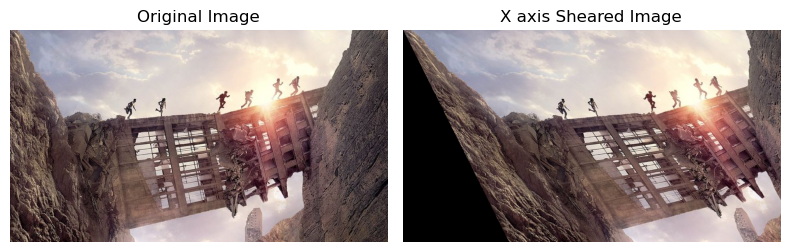

In [33]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Define the horizontal shear factor (sh_x)
sh_x = 0.5  # Horizontal shear factor

# Create a new output image (initialized with zeros, same size as the original)
sheared_img = np.zeros_like(img)

# Loop through each pixel in the output image
for y in range(h):
    for x in range(w):
        # Calculate new x position after horizontal shearing
        new_x = int(x + sh_x * y)  # Apply shear based on y-coordinate

        # Check if the new position is within the bounds of the image
        if 0 <= new_x < w:
            # Set the pixel value in the sheared image
            sheared_img[y, new_x] = RGB_img[y, x]

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Sheared image visualization
plt.subplot(1, 2, 2)
plt.imshow(sheared_img)
plt.title("X axis Sheared Image")
plt.axis("off")

plt.tight_layout()
plt.show()

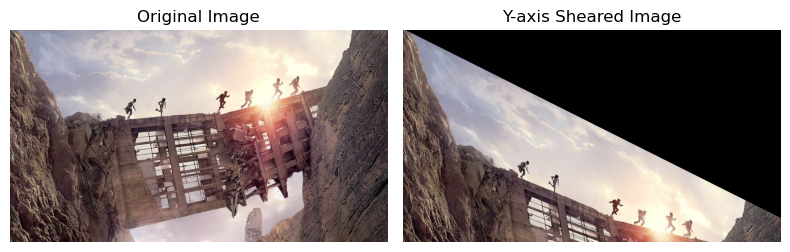

In [35]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Define the vertical shear factor (sh_y)
sh_y = 0.5  # Vertical shear factor

# Create a new output image (initialized with zeros, same size as the original)
sheared_img = np.zeros_like(img)

# Loop through each pixel in the output image
for y in range(h):
    for x in range(w):
        # Calculate new y position after vertical shearing
        new_y = int(y + sh_y * x)  # Apply shear based on x-coordinate

        # Check if the new position is within the bounds of the image
        if 0 <= new_y < h:
            # Set the pixel value in the sheared image
            sheared_img[new_y, x] = RGB_img[y, x]

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Sheared iamge visualization
plt.subplot(1, 2, 2)
plt.imshow(sheared_img)
plt.title("Y-axis Sheared Image")
plt.axis("off")

plt.tight_layout()
plt.show()

(-0.5, 735.5, 413.5, -0.5)

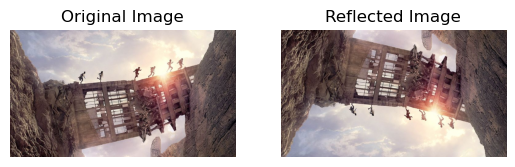

In [37]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Create a new output image (initialized with zeros, same size as the original)
reflected_img = np.zeros_like(img)

# Loop through each pixel in the original image
for y in range(h):
    for x in range(w):
        # Calculate the new y position for vertical reflection (mirror across X-axis)
        new_y = h - 1 - y
        
        # Set the pixel value in the reflected image
        reflected_img[new_y, x] = RGB_img[y, x]

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Reflected iamge visualization
plt.subplot(1, 2, 2)
plt.imshow(reflected_img)
plt.title("Reflected Image")
plt.axis("off")


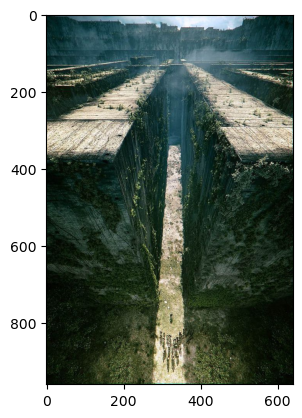

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/DELL/OneDrive/Desktop/Images/tmr1.jpg")

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_img)

plt.show()

In [47]:
print(img.shape)

(960, 640, 3)


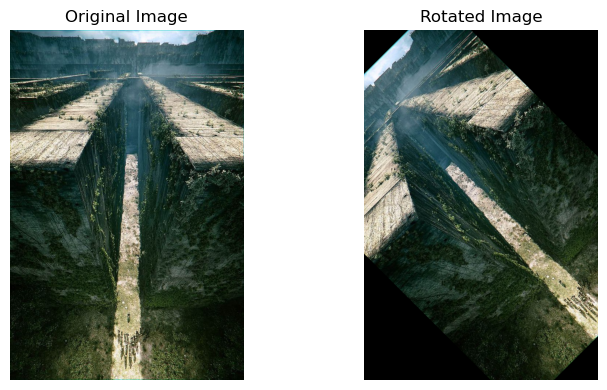

In [49]:
# Get image dimensions
h, w = RGB_img.shape[:2]

# Define the rotation angle and convert it to radians
angle = 45
theta = np.radians(angle)

# Define the center of rotation (center of the image)
center = (w // 2, h // 2)

# Create an empty image (rotated image will be stored here)
rotated_img = np.zeros_like(RGB_img)

# Manually compute the rotation matrix
# [ cos(θ)  -sin(θ)  tx ]
# [ sin(θ)   cos(θ)  ty ]
# Where tx and ty are the translation to center the image
# The matrix rotates around the center of the image
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

# Loop through each pixel in the rotated image
for i in range(h):
    for j in range(w):
        # Translate the pixel coordinates so the rotation happens around the center
        x = j - center[0]
        y = i - center[1]

        # Apply the rotation matrix to the coordinates
        new_x = int(cos_theta * x - sin_theta * y + center[0])
        new_y = int(sin_theta * x + cos_theta * y + center[1])

        # Check if the new pixel is within the bounds of the original image
        if 0 <= new_x < w and 0 <= new_y < h:
            rotated_img[i, j] = RGB_img[new_y, new_x]

# Visualize the original and rotated images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Rotated image visualization
plt.subplot(1, 2, 2)
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()

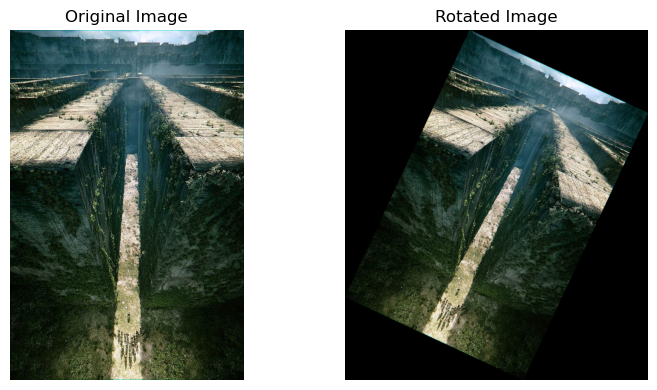

In [51]:
# Get image dimensions
h, w = RGB_img.shape[:2]

# Define the angle of rotation (in degrees)
angle = 25
theta = np.radians(angle)

# Calculate the center of the image
center = (w // 2, h // 2)

# Calculate the sine and cosine of the rotation angle
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

# Compute the new width and height of the rotated image
abs_cos = abs(cos_theta)
abs_sin = abs(sin_theta)

# New dimensions of the rotated image
new_w = int(h * abs_sin + w * abs_cos)
new_h = int(h * abs_cos + w * abs_sin)

# Create an empty image with the new dimensions
rotated_img = np.zeros((new_h, new_w, 3), dtype=RGB_img.dtype)

# Calculate the translation to center the rotated image in the new canvas
# Translate the center of the image to the middle of the new rotated image
new_center = (new_w // 2, new_h // 2)

# Loop through each pixel in the rotated image
for i in range(new_h):
    for j in range(new_w):
        # Translate pixel coordinates to the original image's coordinate system
        x = j - new_center[0]
        y = i - new_center[1]

        # Reverse the translation and apply the rotation matrix
        original_x = int(cos_theta * x + sin_theta * y + center[0])
        original_y = int(-sin_theta * x + cos_theta * y + center[1])

        # If the pixel is within bounds of the original image, copy the pixel value
        if 0 <= original_x < w and 0 <= original_y < h:
            rotated_img[i, j] = RGB_img[original_y, original_x]

# Visualize the original and rotated images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Rotated image visualization
plt.subplot(1, 2, 2)
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()

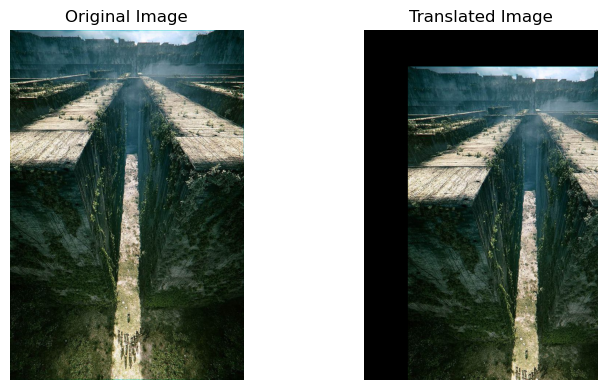

In [13]:
# Get the dimensions of the image
h, w = RGB_img.shape[:2]

# Define the translation amount (tx, ty)
tx, ty = 120, 100  # 50 pixels to the right, 100 pixels down

# Create an empty image for the translated result (initialized to zeros)
translated_img = np.zeros_like(RGB_img)

# Loop through each pixel in the original image
for y in range(h):
    for x in range(w):
        # Calculate the new position after translation
        new_x = x + tx
        new_y = y + ty
        
        # Check if the new position is within the bounds of the translated image
        if 0 <= new_x < w and 0 <= new_y < h:
            translated_img[new_y, new_x] = RGB_img[y, x]

# Visualize the original and translated images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Translated image visualization
plt.subplot(1, 2, 2)
plt.imshow(translated_img)
plt.title("Translated Image")
plt.axis("off")

plt.tight_layout()
plt.show()

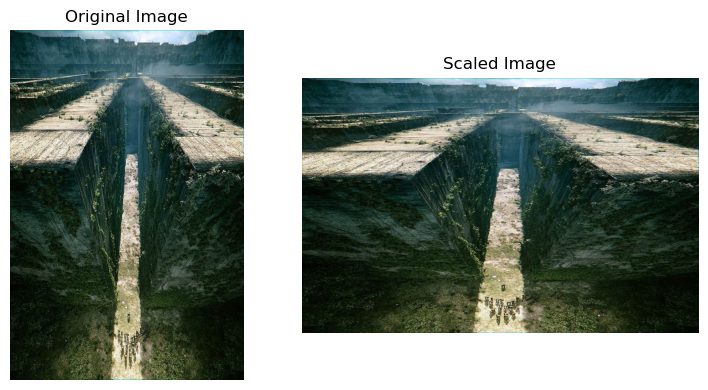

In [57]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Define the scaling factors (sx, sy)
sx, sy = 3.5, 1.5  # Scale by 1.5 times in both X and Y directions

# Calculate the new dimensions of the image
new_w = int(w * sx)
new_h = int(h * sy)

# Create a new output image (initialized with zeros, new size after scaling)
scaled_img = np.zeros((new_h, new_w, 3), dtype=np.uint8)

# Loop through each pixel in the scaled image
for new_y in range(new_h):
    for new_x in range(new_w):
        # Calculate the original position (x, y) in the input image
        orig_x = int(new_x / sx)
        orig_y = int(new_y / sy)
        
        # Check if the calculated position is within the bounds of the original image
        if 0 <= orig_x < w and 0 <= orig_y < h:
            # Set the pixel value in the scaled image
            scaled_img[new_y, new_x] = RGB_img[orig_y, orig_x]

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Scaled image visualization
plt.subplot(1, 2, 2)
plt.imshow(scaled_img)
plt.title("Scaled Image")
plt.axis("off")

plt.tight_layout()
plt.show()

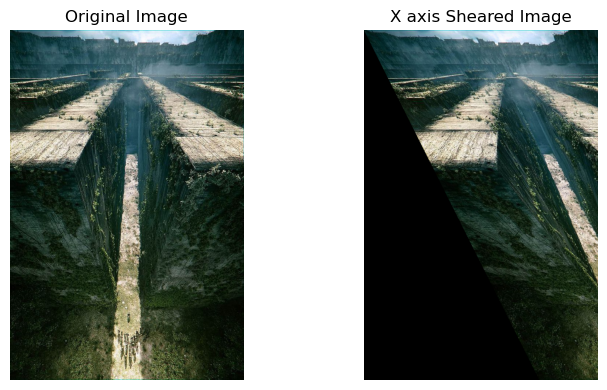

In [59]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Define the horizontal shear factor (sh_x)
sh_x = 0.5  # Horizontal shear factor

# Create a new output image (initialized with zeros, same size as the original)
sheared_img = np.zeros_like(img)

# Loop through each pixel in the output image
for y in range(h):
    for x in range(w):
        # Calculate new x position after horizontal shearing
        new_x = int(x + sh_x * y)  # Apply shear based on y-coordinate

        # Check if the new position is within the bounds of the image
        if 0 <= new_x < w:
            # Set the pixel value in the sheared image
            sheared_img[y, new_x] = RGB_img[y, x]

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Sheared image visualization
plt.subplot(1, 2, 2)
plt.imshow(sheared_img)
plt.title("X axis Sheared Image")
plt.axis("off")

plt.tight_layout()
plt.show()

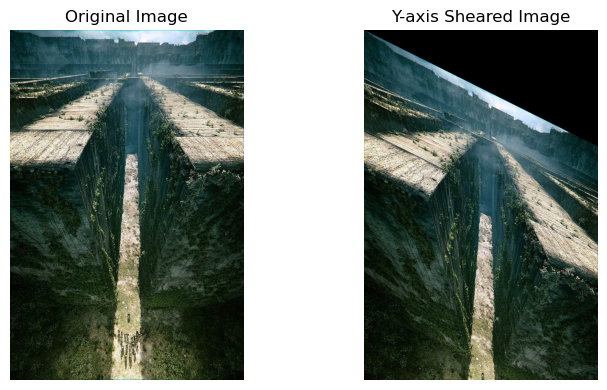

In [61]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Define the vertical shear factor (sh_y)
sh_y = 0.5  # Vertical shear factor

# Create a new output image (initialized with zeros, same size as the original)
sheared_img = np.zeros_like(img)

# Loop through each pixel in the output image
for y in range(h):
    for x in range(w):
        # Calculate new y position after vertical shearing
        new_y = int(y + sh_y * x)  # Apply shear based on x-coordinate

        # Check if the new position is within the bounds of the image
        if 0 <= new_y < h:
            # Set the pixel value in the sheared image
            sheared_img[new_y, x] = RGB_img[y, x]

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Sheared iamge visualization
plt.subplot(1, 2, 2)
plt.imshow(sheared_img)
plt.title("Y-axis Sheared Image")
plt.axis("off")

plt.tight_layout()
plt.show()

(-0.5, 639.5, 959.5, -0.5)

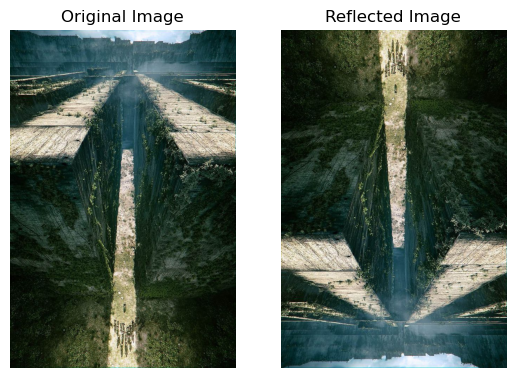

In [63]:
# Get the dimensions of the image
h, w = img.shape[:2]

# Create a new output image (initialized with zeros, same size as the original)
reflected_img = np.zeros_like(img)

# Loop through each pixel in the original image
for y in range(h):
    for x in range(w):
        # Calculate the new y position for vertical reflection (mirror across X-axis)
        new_y = h - 1 - y
        
        # Set the pixel value in the reflected image
        reflected_img[new_y, x] = RGB_img[y, x]

# Original image
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")
plt.axis("off")

# Reflected iamge visualization
plt.subplot(1, 2, 2)
plt.imshow(reflected_img)
plt.title("Reflected Image")
plt.axis("off")